In [216]:
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [217]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1 ):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths


In [218]:
S0 = 1000
r = 0.05
sigma = 0.02
T = 1.0
M =50
I = 25000

In [219]:
paths = gen_paths(S0, r, sigma, T, M, I)

Text(0, 0.5, 'index level')

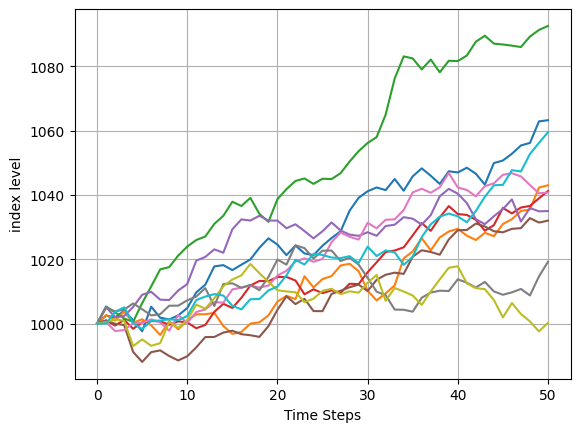

In [220]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('index level')

In [221]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [222]:
log_returns

array([[ 0.00247693,  0.00264712,  0.00532016, ...,  0.00051163,
         0.00087897,  0.00731311],
       [-0.00055296, -0.00170462, -0.00182847, ..., -0.00031234,
         0.00218946, -0.00148112],
       [ 0.00202038,  0.00281071, -0.0019129 , ...,  0.0018779 ,
         0.00373741,  0.00341237],
       ...,
       [ 0.00075505,  0.00047244,  0.00299856, ...,  0.00361978,
        -0.00203695,  0.0069583 ],
       [ 0.00631461,  0.0065429 ,  0.00187985, ...,  0.0074336 ,
         0.00251969,  0.00334254],
       [ 0.00034217,  0.00068862,  0.0011449 , ..., -0.00211961,
         0.00445883,  0.00132012]])

In [223]:
paths[:, 0].round(4)

array([1000.    , 1002.48  , 1001.9258, 1003.9521, 1001.0692,  997.6042,
       1005.2629, 1001.8375, 1001.2935, 1002.5462, 1004.8414, 1009.6918,
       1012.0922, 1017.7619, 1018.1741, 1016.6283, 1018.2958, 1019.9303,
       1023.5629, 1026.4965, 1024.5519, 1021.2803, 1024.2572, 1021.8113,
       1021.2672, 1024.2039, 1026.5724, 1028.6616, 1035.071 , 1039.0735,
       1041.1204, 1042.3031, 1041.4711, 1044.9312, 1041.2982, 1045.7465,
       1048.2441, 1045.9449, 1043.401 , 1047.321 , 1046.9618, 1048.4411,
       1046.5748, 1043.1903, 1049.8891, 1050.6819, 1052.7739, 1055.3498,
       1056.1469, 1062.8372, 1063.2009])

In [224]:
log_returns[:, 0].round(4)

array([ 0.0025, -0.0006,  0.002 , -0.0029, -0.0035,  0.0076, -0.0034,
       -0.0005,  0.0013,  0.0023,  0.0048,  0.0024,  0.0056,  0.0004,
       -0.0015,  0.0016,  0.0016,  0.0036,  0.0029, -0.0019, -0.0032,
        0.0029, -0.0024, -0.0005,  0.0029,  0.0023,  0.002 ,  0.0062,
        0.0039,  0.002 ,  0.0011, -0.0008,  0.0033, -0.0035,  0.0043,
        0.0024, -0.0022, -0.0024,  0.0037, -0.0003,  0.0014, -0.0018,
       -0.0032,  0.0064,  0.0008,  0.002 ,  0.0024,  0.0008,  0.0063,
        0.0003])

# **Normality Test**

In [225]:
def print_statistics(array):

    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value' ))
    print( 30 * "-")
    print("%14s %15s" % ('size', sta[0]))
    print("%14s %15s" % ('min', sta[1][0]))
    print("14%s %15s" %  ('max', sta[1][1]))
    print("14%s %15s" % ('mean', sta[2]))
    print("14%s %15s" % ('std', np.sqrt(sta[3])))
    print("14%s %15s" % ('skew', sta[4]))
    print("14%s %15s" % ('kurtosis', sta[5]))


In [226]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size         1250000
           min -0.012791651908034368
14max 0.014827138291830294
14mean 0.0009960000000000004
14std 0.0028284282561177186
14skew 0.0013956240441368455
14kurtosis 0.002512726872712534


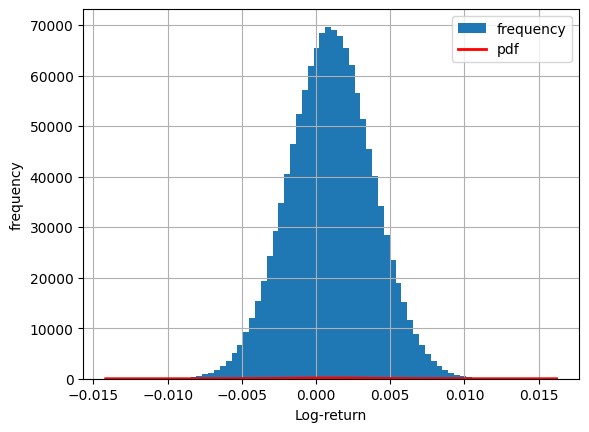

In [227]:
plt.hist(log_returns.flatten(), bins=70,  label='frequency')
plt.grid(True )
plt.xlabel('Log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

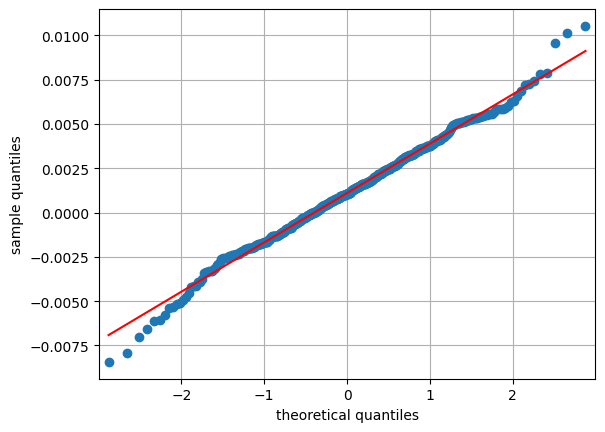

In [228]:
sm.qqplot(log_returns.flatten()[:500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [229]:
def normality_tests(arr):

    print("Skew of data set %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr) [1])
    print("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print("kurt test p-value %14.3f" % scs.kurtosistest (arr) [1])
    print("Norm test p-value %14.3f" % scs.normaltest (arr) [1])

In [230]:
normality_tests(log_returns.flatten())

Skew of data set          0.001
Skew test p-value          0.524
Kurt of data set          0.003
kurt test p-value          0.565
Norm test p-value          0.692


Text(0.5, 1.0, 'log Data')

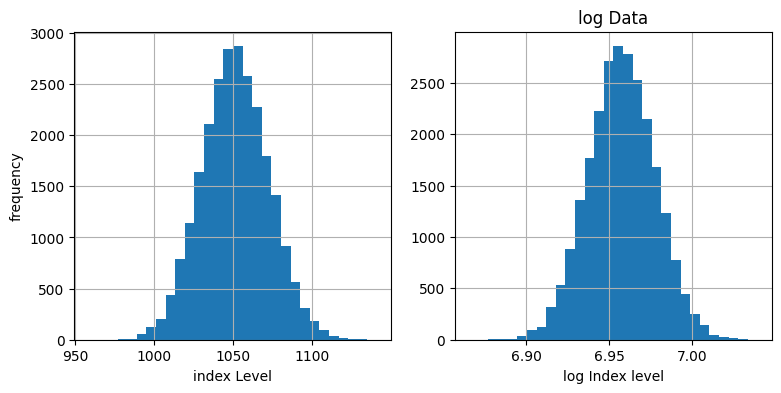

In [231]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index Level')
ax1.set_ylabel('frequency')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log Index level')
ax2.set_title('log Data')

In [232]:
 print_statistics(paths[-1])

     statistic           value
------------------------------
          size           25000
           min 958.7275792324056
14max 1140.8244142087394
14mean 1051.2723411900745
14std 21.08911945667444
14skew 0.05266484797198531
14kurtosis -0.01523681202620697


In [233]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size           25000
           min 6.865606966992019
14max 7.0395064503853995
14mean 6.957555278982137
14std 0.020059991200049507
14skew -0.006950052601409831
14kurtosis -0.01795156200724568


In [234]:
normality_tests(np.log(paths[-1]))

Skew of data set         -0.007
Skew test p-value          0.654
Kurt of data set         -0.018
kurt test p-value          0.574
Norm test p-value          0.772


In [235]:
import yfinance as yf
import pandas as pd

In [236]:
symbols = [ 'GS']
start = '2024-01-01'
end='2024-02-29'

In [237]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = yf.download(sym, start, end)['Adj Close']
data.dropna()

[*********************100%%**********************]  1 of 1 completed


,GS
Date,
2024-01-02,388.299988
2024-01-03,381.790009
2024-01-04,382.950012
2024-01-05,386.440002
2024-01-08,388.859985
2024-01-09,383.739990
2024-01-10,381.959991
2024-01-11,379.750000
2024-01-12,377.750000


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2024-01-02 to 2024-02-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GS      34 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [239]:
data.head()

,GS
Date,
2024-01-02,388.299988
2024-01-03,381.790009
2024-01-04,382.950012
2024-01-05,386.440002
2024-01-08,388.859985


<Axes: xlabel='Date'>

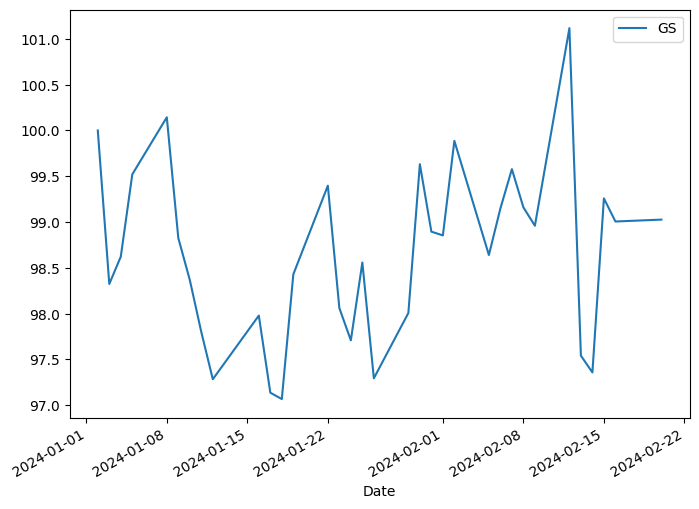

In [240]:
(data / data.iloc[0] * 100).plot(figsize=(8, 6))

In [241]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,GS
Date,
2024-01-02,NaN
2024-01-03,-0.016907
2024-01-04,0.003034
2024-01-05,0.009072
2024-01-08,0.006243


array([[<Axes: title={'center': 'GS'}>]], dtype=object)

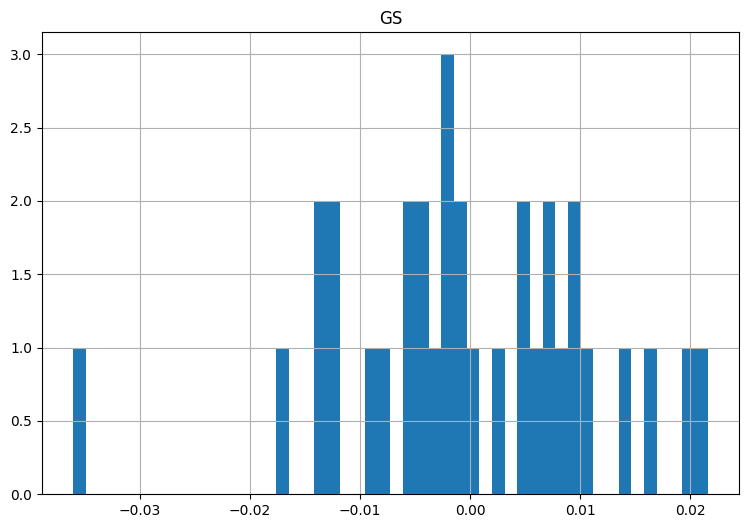

In [242]:
log_returns.hist(bins=50, figsize=(9, 6))

In [243]:
for sym in symbols:
    print("\nResults for symbols %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbols GS
------------------------------
     statistic           value
------------------------------
          size              33
           min -0.036016842006519785
14max 0.02157376661243598
14mean -0.0002964372931645832
14std 0.011704896933364087
14skew -0.5764155349617478
14kurtosis 1.0600998932632386


Text(0, 0.5, 'sample Quantiles')

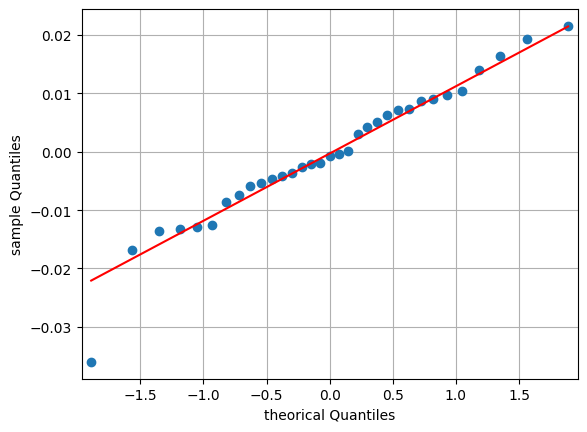

In [244]:
sm.qqplot(log_returns['GS'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theorical Quantiles')
plt.ylabel('sample Quantiles')

In [245]:
for sym in symbols :
    print("\nResults for symbols %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbols GS
--------------------------------
Skew of data set         -0.576
Skew test p-value          0.133
Kurt of data set          1.060
kurt test p-value          0.106
Norm test p-value          0.088


# **Portfolio Optimization**

In [246]:
log_returns.mean() * 252

GS   -0.074702
dtype: float64

In [247]:
log_returns.std() * 252

GS    2.949634
dtype: float64

In [248]:
noa = len(symbols)

In [249]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [250]:
weights

array([1.])

In [251]:
np.sum(log_returns.mean() * weights) * 252

-0.07470219787747488

In [252]:
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))

0.03452516227961036

In [253]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

0.18580947844394366

In [254]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(log_returns.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))))


prets = np.array(prets)
pvols = np.array(pvols)



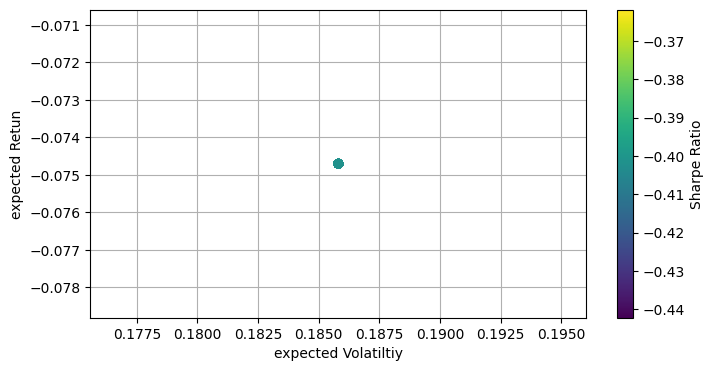

In [255]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected Volatiltiy')
plt.ylabel('expected Retun')
plt.colorbar(label='Sharpe Ratio')

In [256]:
data.corr()

,GS
GS,1.0


In [257]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(log_returns.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [258]:
import scipy.optimize as sco

In [259]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [260]:
cons = ({'type': 'eq', 'fun': lambda x : np.sum(x) - 1})

In [261]:
bnds = tuple((0, 1) for x in range(noa))

In [262]:
noa * [1. / noa, ]

[1.0]

In [263]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                    bounds=bnds, constraints=cons)

CPU times: user 5.64 ms, sys: 0 ns, total: 5.64 ms
Wall time: 6.42 ms


In [264]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.402036529584316
       x: [ 1.000e+00]
     nit: 1
     jac: [-0.000e+00]
    nfev: 2
    njev: 1

In [265]:
opts['x'].round(3)

array([1.])

In [266]:
statistics(opts['x']).round(3)

array([-0.075,  0.186, -0.402])